#  (2) Part 2: Geospatial Analysis with GeoPandas: Task 1 y Task 2

In [9]:
# --------------------------------------------------------------------------
# Librerías para Análisis de Datos y Geográfico 
# --------------------------------------------------------------------------

# Para la manipulación de datos tabulares (tablas, DataFrames)
import pandas as pd

# Para la manipulación de datos geoespaciales (el corazón del proyecto)
import geopandas as gpd

# Para crear y trabajar con objetos geométricos (puntos, líneas, polígonos)
from shapely.geometry import Point, LineString

# --------------------------------------------------------------------------
# Librerías para Visualización de Datos 
# --------------------------------------------------------------------------

# Para la creación de mapas interactivos
import folium
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

# Para la creación de gráficos estáticos (barras, líneas, etc.)
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------------------------------
# Librería para la Aplicación Web (Dashboard) 
# --------------------------------------------------------------------------

# Para construir y desplegar la aplicación interactiva
import streamlit as st

In [ ]:
#  Carga de Datos
# Se construye la ruta al archivo de forma segura y se carga con la codificación 'latin1'
ruta_archivo = Path.cwd() / "data" / "IPRESS.csv"
print(f"Cargando archivo desde: {ruta_archivo}")

try:
    data = pd.read_csv(ruta_archivo, encoding='latin1')
    print("✅ Archivo cargado exitosamente.")
except Exception as e:
    print(f"❌ Ocurrió un error al cargar el archivo: {e}")
    # Si hay un error, detenemos la ejecución para no trabajar con datos vacíos
    data = pd.DataFrame()

if not data.empty:
    print(f"Forma inicial de los datos: {data.shape}")

    # --- 2. Filtrado y Limpieza ---
    # NOTA: Asegúrate de que los nombres de las columnas ('Condición', 'NORTE', etc.)
    # coincidan exactamente con los de tu archivo CSV. Python distingue mayúsculas y minúsculas.

    # Paso 1: Mantener solo hospitales operativos
    print("\nFiltrando para mantener solo hospitales 'EN FUNCIONAMIENTO'...")
    data = data[data["Condición"] == "EN FUNCIONAMIENTO"]
    print(f"Forma después de filtrar por condición: {data.shape}")

    # Paso 2: Eliminar filas sin coordenadas (valores nulos en NORTE o ESTE)
    print("\nEliminando filas sin coordenadas (NaNs en 'NORTE' o 'ESTE')...")
    data = data.dropna(subset=['NORTE', 'ESTE'])
    print(f"Forma después de eliminar nulos en coordenadas: {data.shape}")

    # Verificación de que no quedan nulos en esas columnas
    print("Conteo de nulos en coordenadas después de la limpieza:")
    print(data[['NORTE', 'ESTE']].isna().sum())


    # --- 3. Selección y Preparación de Columnas ---

    # Paso 3: Asegurar que 'UBIGEO' sea de tipo numérico entero
    # Se convierte primero a string para evitar errores y luego a entero.
    print("\nConvirtiendo la columna 'UBIGEO' a tipo entero...")
    data['UBIGEO'] = pd.to_numeric(data['UBIGEO'], errors='coerce').astype('Int64')


    # Paso 4: Seleccionar solo las columnas clave para el análisis
    print("Seleccionando columnas de interés...")
    columnas_clave = [
        'UBIGEO',
        'Institución',
        'Nombre del establecimiento',
        'Clasificación',
        'Departamento',
        'Provincia',
        'Distrito',
        'Estado',
        'NORTE',
        'ESTE'
    ]
    data = data[columnas_clave]

    # --- 4. Resultado Final ---
    print("\n--- Proceso de limpieza y preparación completado ---")
    print(f"✅ Forma final de los datos: {data.shape}")
    print("\nPrimeras 5 filas del DataFrame limpio:")
    display(data.head())

Cargando archivo desde: /Users/valentinalinares/Documents/GitHub/Hospitals-Access-Peru/data/IPRESS.csv
✅ Archivo cargado exitosamente.
Forma inicial de los datos: (20819, 33)

Filtrando para mantener solo hospitales 'EN FUNCIONAMIENTO'...
Forma después de filtrar por condición: (20800, 33)

Eliminando filas sin coordenadas (NaNs en 'NORTE' o 'ESTE')...
Forma después de eliminar nulos en coordenadas: (7942, 33)
Conteo de nulos en coordenadas después de la limpieza:
NORTE    0
ESTE     0
dtype: int64

Convirtiendo la columna 'UBIGEO' a tipo entero...
Seleccionando columnas de interés...

--- Proceso de limpieza y preparación completado ---
✅ Forma final de los datos: (7942, 10)

Primeras 5 filas del DataFrame limpio:


,UBIGEO,Institución,Nombre del establecimiento,Clasificación,Departamento,Provincia,Distrito,Estado,NORTE,ESTE
1,60611,GOBIERNO REGIONAL,AMBATO,PUESTOS DE SALUD O POSTAS DE SALUD,CAJAMARCA,CUTERVO,SANTA CRUZ,ACTIVADO,-78.858380,-6.133523
2,160302,GOBIERNO REGIONAL,SANTA ISABEL DE YUMBATURO,PUESTOS DE SALUD O POSTAS DE SALUD,LORETO,LORETO,PARINARI,ACTIVADO,-74.258139,-4.581509
6,150142,MINSA,PUESTO DE SALUD HEROES DEL CENEPA,PUESTOS DE SALUD O POSTAS DE SALUD,LIMA,LIMA,VILLA EL SALVADOR,ACTIVADO,-76.930608,-12.248699
12,250101,GOBIERNO REGIONAL,NUEVA BETANIA,PUESTOS DE SALUD O POSTAS DE SALUD,UCAYALI,CORONEL PORTILLO,CALLERIA,ACTIVADO,-74.296531,-8.398366
15,220907,GOBIERNO REGIONAL,PONGO ISLA,PUESTOS DE SALUD O POSTAS DE SALUD,SAN MARTIN,SAN MARTIN,HUIMBAYOC,ACTIVADO,-75.885812,-6.438298


Cargando shapefile desde: /Users/valentinalinares/Documents/GitHub/Hospitals-Access-Peru/data/shape_file/DISTRITOS.shp
✅ Shapefile cargado exitosamente.

Tipos de datos de las columnas:
UBIGEO         int64
geometry    geometry
dtype: object


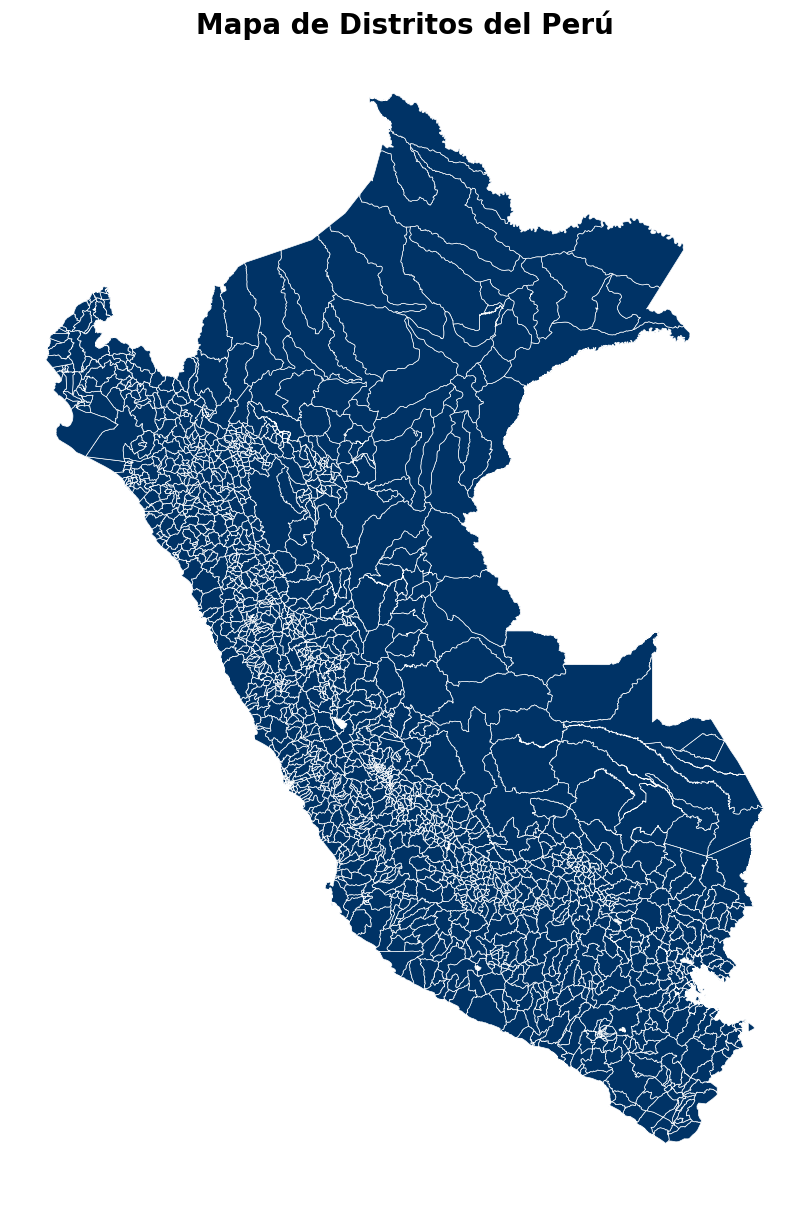

In [15]:
#  Carga del Shapefile de Distritos  

# Construimos la ruta correcta: Proyecto -> data -> shape_file -> archivo.shp
ruta_shapefile = Path.cwd() / "data" / "shape_file" / "DISTRITOS.shp"

print(f"Cargando shapefile desde: {ruta_shapefile}")

try:
    # Leemos el archivo geoespacial
    maps = gpd.read_file(ruta_shapefile)
    print("✅ Shapefile cargado exitosamente.")

except Exception as e:
    print(f"❌ Error al cargar el shapefile: {e}")
    # Creamos un GeoDataFrame vacío para evitar errores posteriores si la carga falla
    maps = gpd.GeoDataFrame()

# (El resto del código de preparación y visualización sigue igual)
if not maps.empty:
    # --- 2. Preparación de los Datos Geoespaciales ---
    maps = maps[['IDDIST', 'geometry']].rename(columns={'IDDIST': 'UBIGEO'})
    maps['UBIGEO'] = pd.to_numeric(maps['UBIGEO'], errors='coerce')
    
    # --- 3. Verificación ---
    print("\nTipos de datos de las columnas:")
    print(maps.dtypes)
    
    # --- 4. Visualización ---
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    maps.plot(ax=ax, color='#003366', edgecolor='white', linewidth=0.5)
    ax.set_axis_off()
    ax.set_title('Mapa de Distritos del Perú', fontdict={'fontsize': '20', 'fontweight': 'bold'})
    plt.show()

# Task 1: Static Maps — Hospital Count by District

Contando hospitales por UBIGEO...
Conteo finalizado. Primeros 5 resultados:


,UBIGEO,Total_Hospitales
0,10101,28
1,10102,1
2,10103,3
3,10104,1
4,10105,4



Uniendo el conteo de hospitales con el shapefile de distritos...
Unión completada y datos limpios.

Forma del GeoDataFrame final: (1873, 3)
Primeras 5 filas del GeoDataFrame unido:


,UBIGEO,geometry,Total_Hospitales
0,100902,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...",3
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",4
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...",2
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...",7
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...",7



Generando Mapa 1: Total de hospitales por distrito...


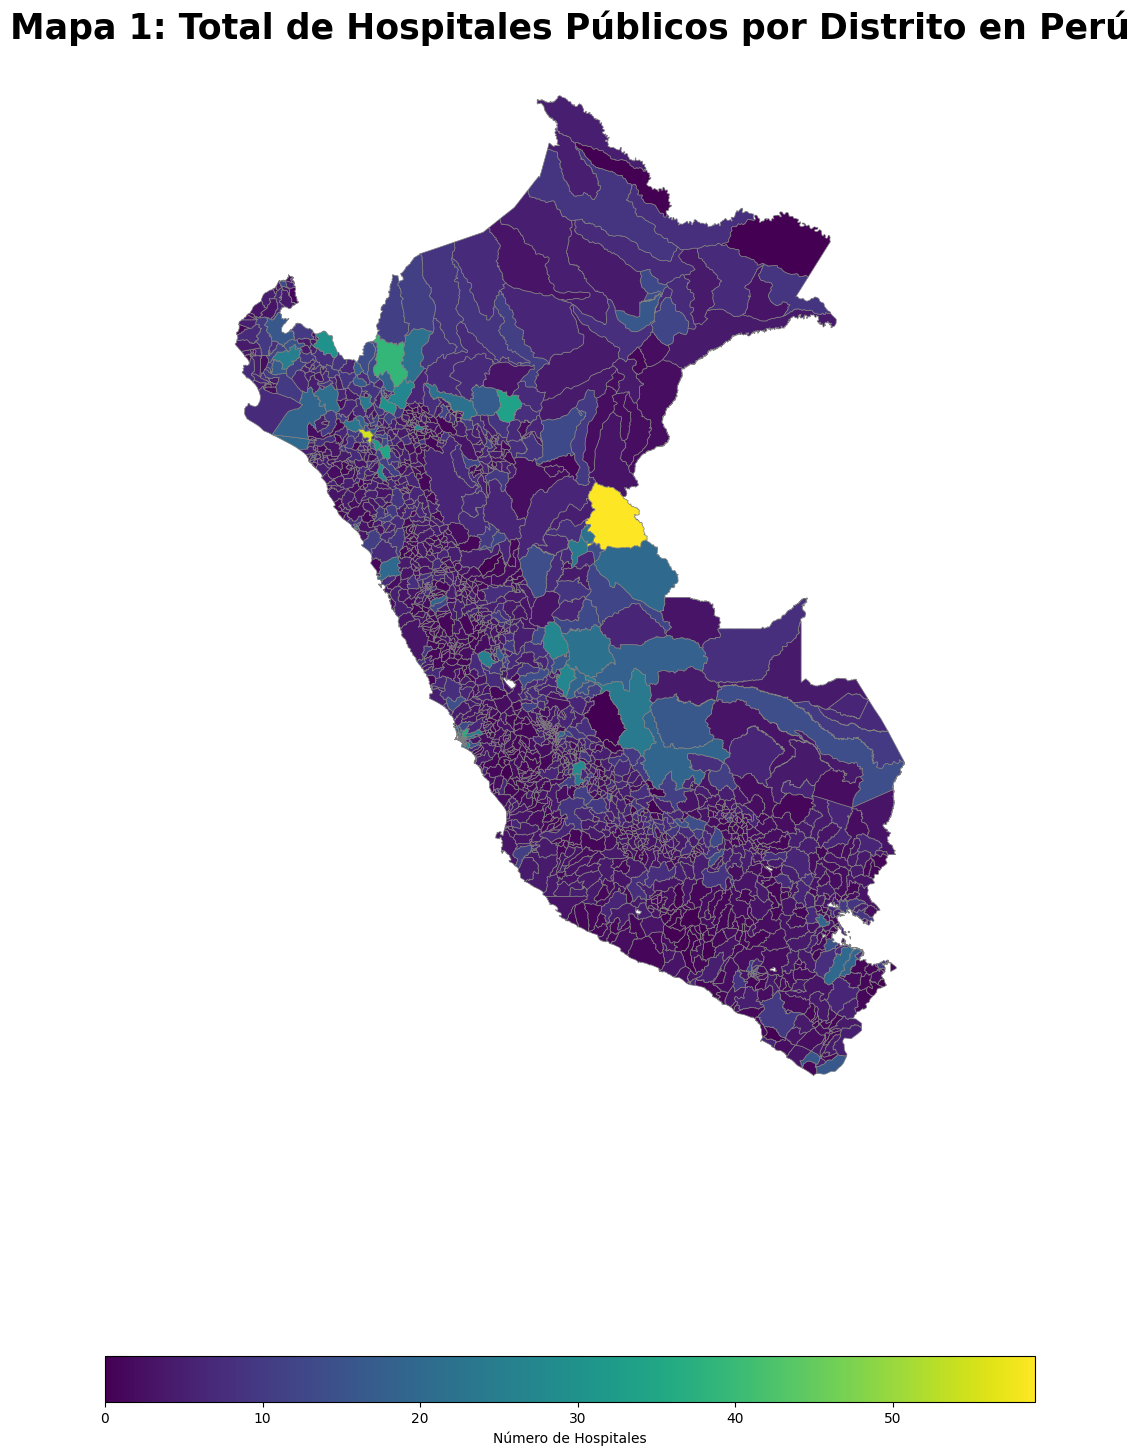

Se encontraron 61 distritos sin hospitales registrados.


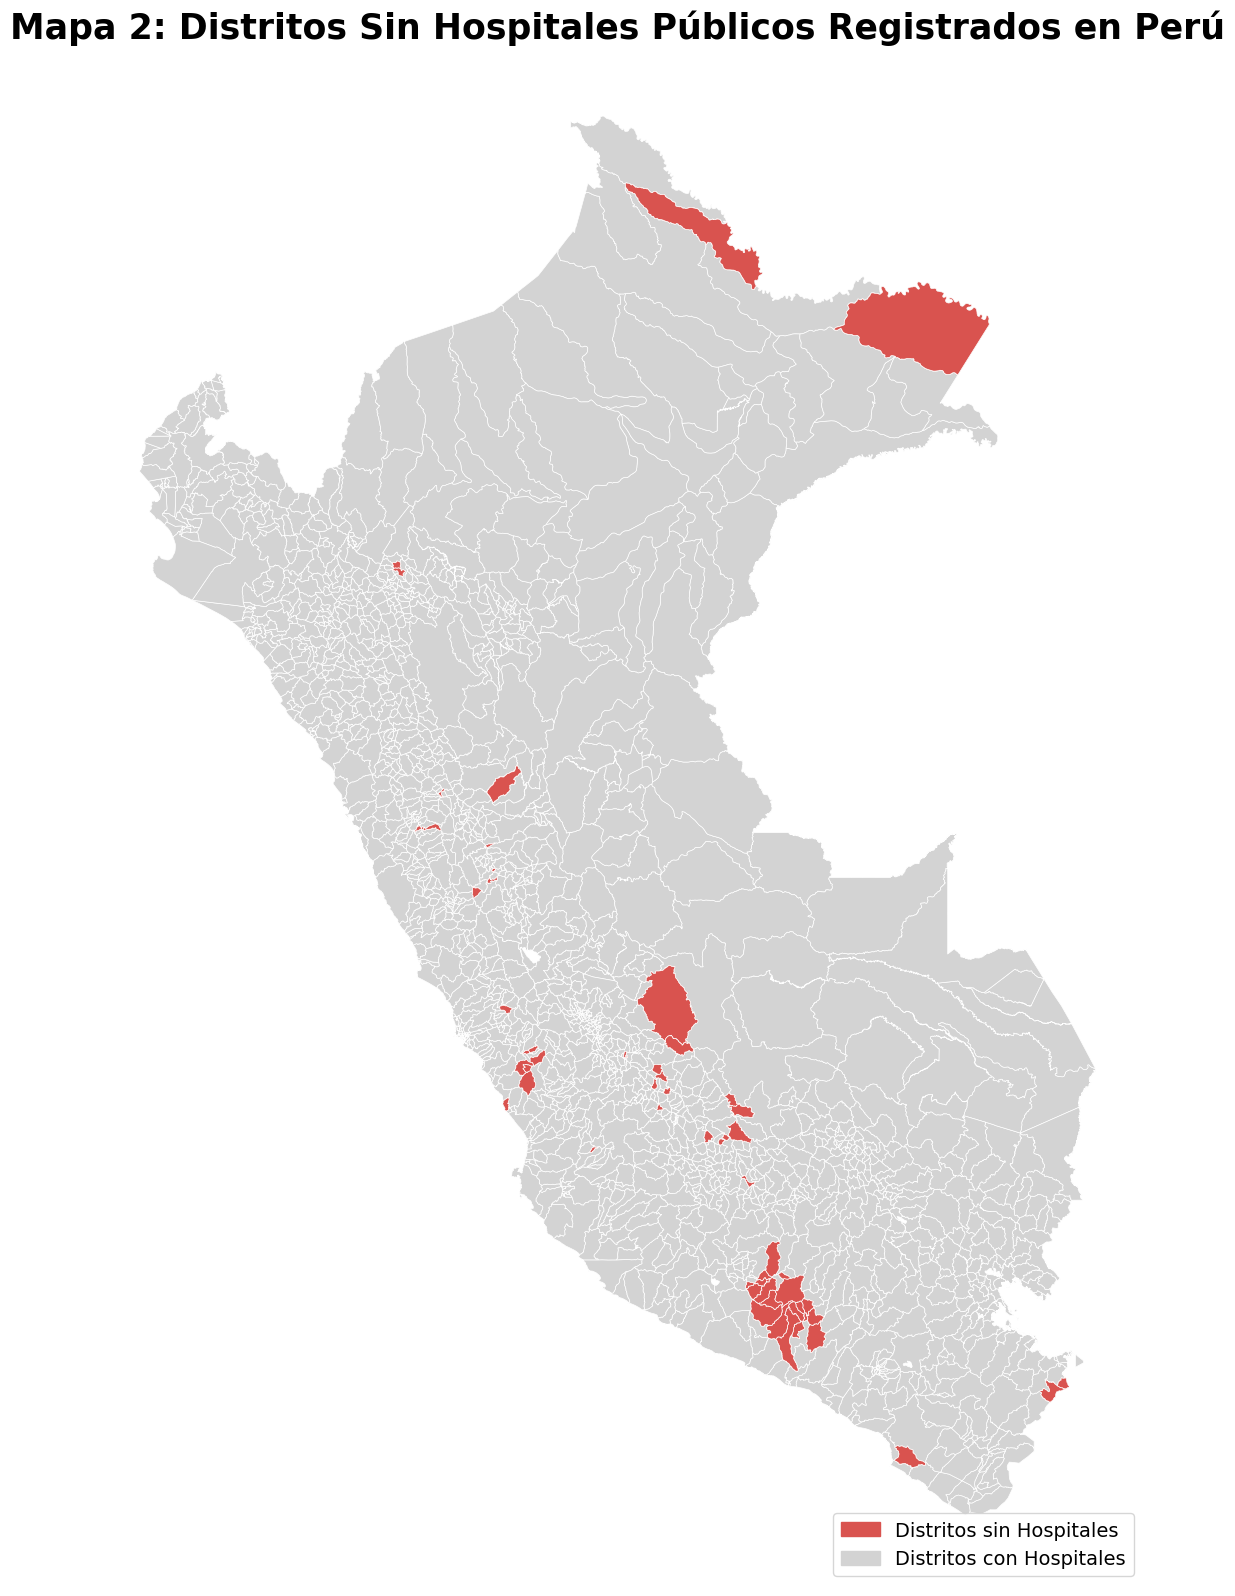

--- Top 10 Distritos con más Hospitales ---


,Total_Hospitales
UBIGEO,
250101,59
60601,55
70101,51
10205,39
150132,37
60701,35
160201,34
60401,32
200201,30


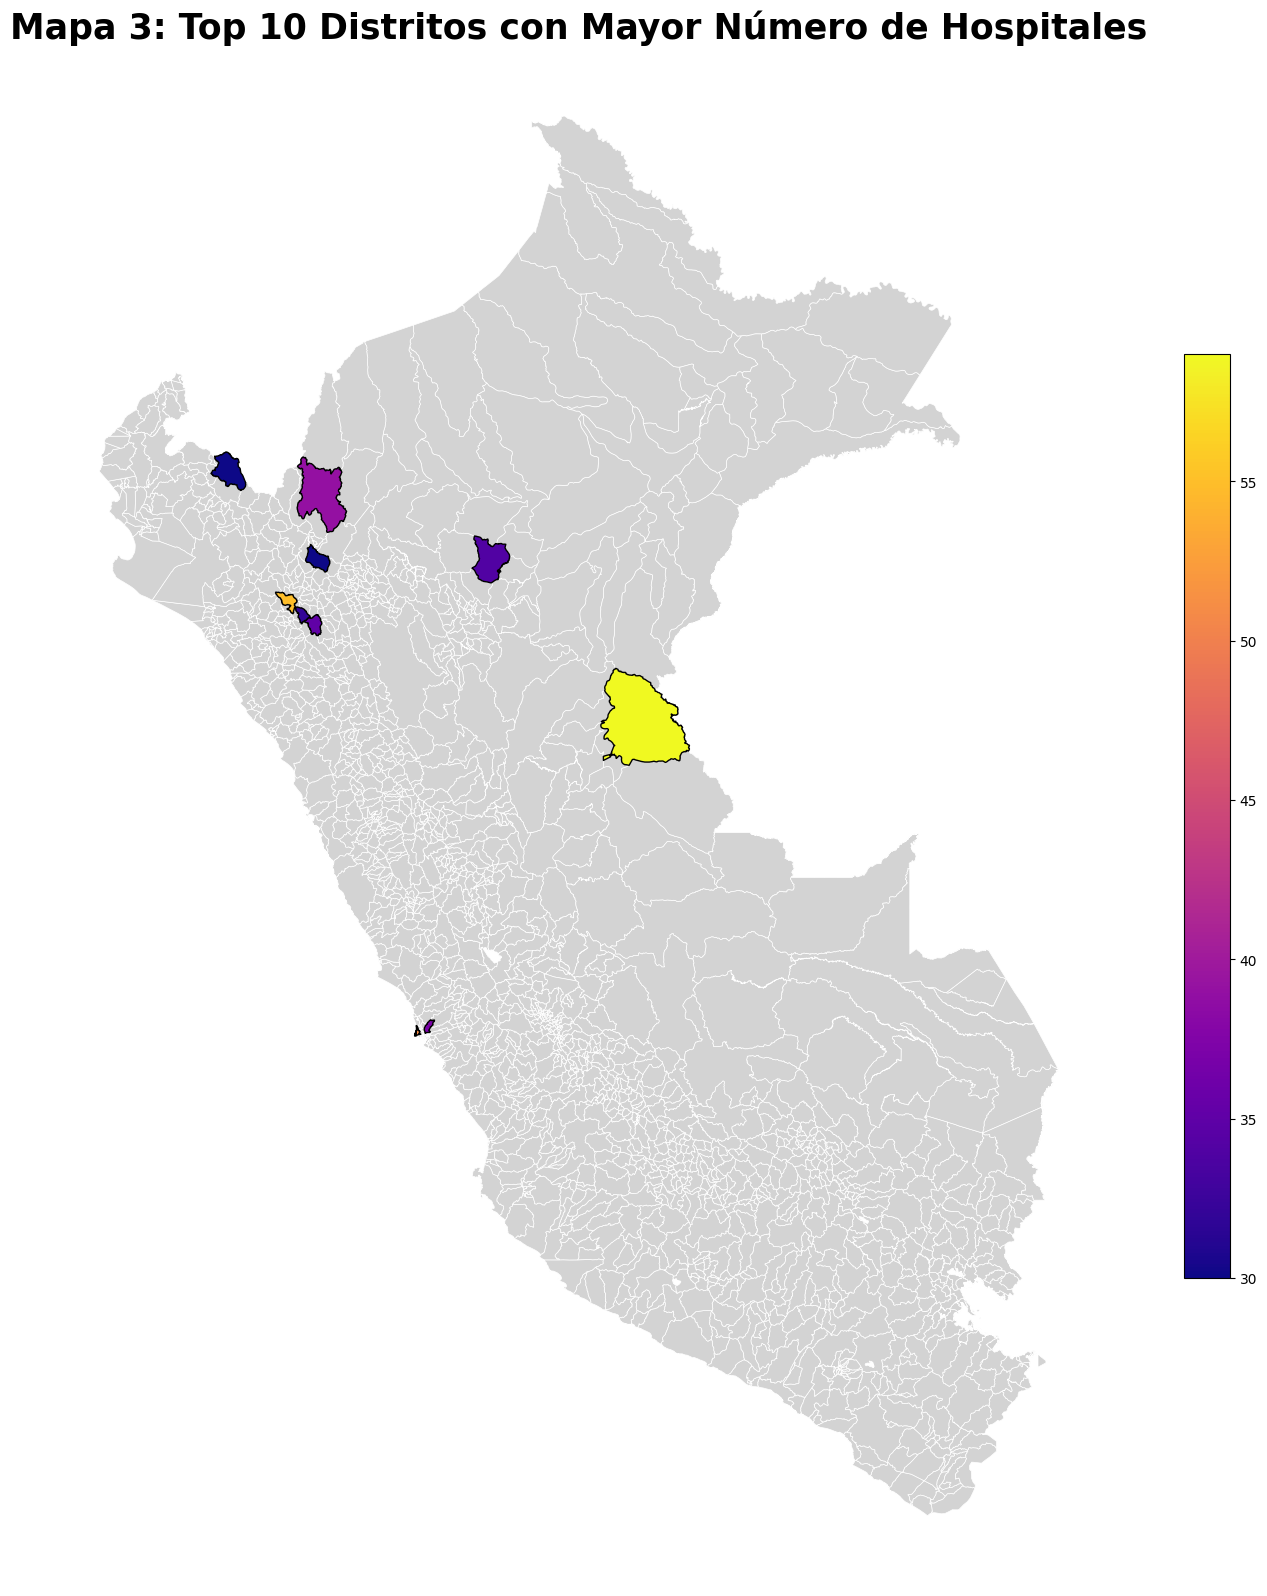

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# --- 1. Conteo de Hospitales por Distrito ---
# Agrupamos los datos de hospitales por UBIGEO y contamos cuántos hay en cada uno.
print("Contando hospitales por UBIGEO...")
hospital_counts = data.groupby('UBIGEO').size().reset_index(name='Total_Hospitales')

print("Conteo finalizado. Primeros 5 resultados:")
display(hospital_counts.head())


# --- 2. Unión (Merge) de los Datos ---
# Unimos el mapa de distritos ('maps') con el conteo de hospitales ('hospital_counts').
# Usamos un 'left' merge para mantener TODOS los distritos, incluso los que no tienen hospitales.
print("\nUniendo el conteo de hospitales con el shapefile de distritos...")
mapa_hospitales = maps.merge(hospital_counts, on='UBIGEO', how='left')


# --- 3. Limpieza post-unión ---
# Los distritos sin hospitales tendrán un valor 'NaN' (nulo) después del merge.
# Los reemplazamos por cero y nos aseguramos de que la columna sea de tipo entero.
mapa_hospitales['Total_Hospitales'] = mapa_hospitales['Total_Hospitales'].fillna(0).astype(int)

print("Unión completada y datos limpios.")
print("\nForma del GeoDataFrame final:", mapa_hospitales.shape)
print("Primeras 5 filas del GeoDataFrame unido:")
display(mapa_hospitales.head())


# --------------------------------------------------------------------------
#  Mapa 1: Total de Hospitales por Distrito 
# --------------------------------------------------------------------------

print("\nGenerando Mapa 1: Total de hospitales por distrito...")

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

mapa_hospitales.plot(
    column='Total_Hospitales', # Columna que define el color
    cmap='viridis',            # Paleta de colores ('Reds', 'Blues', 'plasma', etc.)
    linewidth=0.5,             # Grosor de las líneas de frontera
    edgecolor='gray',          # Color de las fronteras
    legend=True,               # Muestra la barra de leyenda de colores
    legend_kwds={
        'label': "Número de Hospitales",
        'orientation': "horizontal",
        'shrink': 0.6
    },
    ax=ax
)

# --- Personalización del Gráfico ---
ax.set_axis_off()
ax.set_title(
    "Mapa 1: Total de Hospitales Públicos por Distrito en Perú",
    fontdict={'fontsize': 25, 'fontweight': 'bold'}
)

plt.show()

# --------------------------------------------------------------------------
#  Mapa 2: Distritos Sin Hospitales Públicos Registrados en Perú
# --------------------------------------------------------------------------

# 'mapa_hospitales' ya existe desde el paso anterior.

# --- 1. Filtrar Distritos sin Hospitales ---
# Seleccionamos los distritos donde el total de hospitales es igual a 0.
distritos_sin_hospitales = mapa_hospitales[mapa_hospitales['Total_Hospitales'] == 0]

print(f"Se encontraron {len(distritos_sin_hospitales)} distritos sin hospitales registrados.")


# --- 2. Generar el Mapa ---
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# Capa base: Dibujamos TODOS los distritos en un color gris claro
mapa_hospitales.plot(
    ax=ax,
    color='lightgray',
    edgecolor='white',
    linewidth=0.5
)

# Capa superior: Dibujamos solo los distritos SIN hospitales en un color que resalte
distritos_sin_hospitales.plot(
    ax=ax,
    color='#d9534f',  # Un color rojo/anaranjado para destacar
    edgecolor='white',
    linewidth=0.5
)

# --- 3. Personalización del Gráfico ---
ax.set_axis_off()
ax.set_title(
    'Mapa 2: Distritos Sin Hospitales Públicos Registrados en Perú',
    fontdict={'fontsize': 25, 'fontweight': 'bold'}
)

# Añadimos una leyenda manual para mayor claridad
import matplotlib.patches as mpatches
legend_sin_hospitales = mpatches.Patch(color='#d9534f', label='Distritos sin Hospitales')
legend_con_hospitales = mpatches.Patch(color='lightgray', label='Distritos con Hospitales')
ax.legend(handles=[legend_sin_hospitales, legend_con_hospitales], loc='lower right', fontsize=14)

plt.show()


# --------------------------------------------------------------------------
#  Mapa 3: Top 10 Distritos con Mayor Número de Hospitales
# --------------------------------------------------------------------------

# 'mapa_hospitales' ya existe desde el paso anterior.

# --- 1. Obtener el Top 10 ---
# Ordenamos los datos de mayor a menor y seleccionamos los 10 primeros.
top10_distritos = mapa_hospitales.sort_values(by='Total_Hospitales', ascending=False).head(10)

print("--- Top 10 Distritos con más Hospitales ---")
# Usamos .set_index() para una visualización más limpia de la tabla
display(top10_distritos[['UBIGEO', 'Total_Hospitales']].set_index('UBIGEO'))


# --- 2. Generar el Mapa ---
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# Capa base: TODOS los distritos en gris
mapa_hospitales.plot(
    ax=ax,
    color='lightgray',
    edgecolor='white',
    linewidth=0.5
)

# Capa superior: El Top 10, coloreado por la cantidad de hospitales
top10_distritos.plot(
    ax=ax,
    column='Total_Hospitales',
    cmap='plasma', # Usamos una paleta de colores vibrante
    edgecolor='black',
    linewidth=1,
    legend=True,
    legend_kwds={'shrink': 0.6}
)

# --- 3. Personalización del Gráfico ---
ax.set_axis_off()
ax.set_title(
    'Mapa 3: Top 10 Distritos con Mayor Número de Hospitales',
    fontdict={'fontsize': 25, 'fontweight': 'bold'}
)

plt.show()

# Task 2: Department-level Analysis

GeoDataFrame a nivel de departamento creado exitosamente.


,Departamento,geometry,UBIGEO,Numero_Hospitales,Departamento_x,Departamento_y
0,AMAZONAS,"POLYGON ((-78.0348 -6.74216, -78.03437 -6.7417...",851804,417,AMAZONASAMAZONASAMAZONASAMAZONASAMAZONASAMAZON...,AMAZONASAMAZONASAMAZONASAMAZONASAMAZONASAMAZON...
1,ANCASH,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...",3417284,416,ANCASHANCASHANCASHANCASHANCASHANCASHANCASHANCA...,ANCASHANCASHANCASHANCASHANCASHANCASHANCASHANCA...
2,APURIMAC,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5...",2431593,375,APURIMACAPURIMACAPURIMACAPURIMACAPURIMACAPURIM...,APURIMACAPURIMACAPURIMACAPURIMACAPURIMACAPURIM...
3,AREQUIPA,"POLYGON ((-72.18562 -16.92467, -72.18593 -16.9...",3631058,224,AREQUIPAAREQUIPAAREQUIPAAREQUIPAAREQUIPAAREQUI...,AREQUIPAAREQUIPAAREQUIPAAREQUIPAAREQUIPAAREQUI...
4,AYACUCHO,"POLYGON ((-74.50284 -15.16064, -74.5036 -15.16...",5971502,387,AYACUCHOAYACUCHOAYACUCHOAYACUCHOAYACUCHOAYACUC...,AYACUCHOAYACUCHOAYACUCHOAYACUCHOAYACUCHOAYACUC...


--- Tabla Resumen: Hospitales por Departamento ---


,Departamento,Numero_Hospitales
0,CAJAMARCA,845
1,LIMA,774
2,JUNIN,445
3,PIURA,442
4,AMAZONAS,417
5,ANCASH,416
6,PUNO,407
7,AYACUCHO,387
8,SAN MARTIN,379
9,APURIMAC,375



✅ Departamento con MÁS hospitales: CAJAMARCA (845 hospitales)
✅ Departamento con MENOS hospitales: TUMBES (54 hospitales)


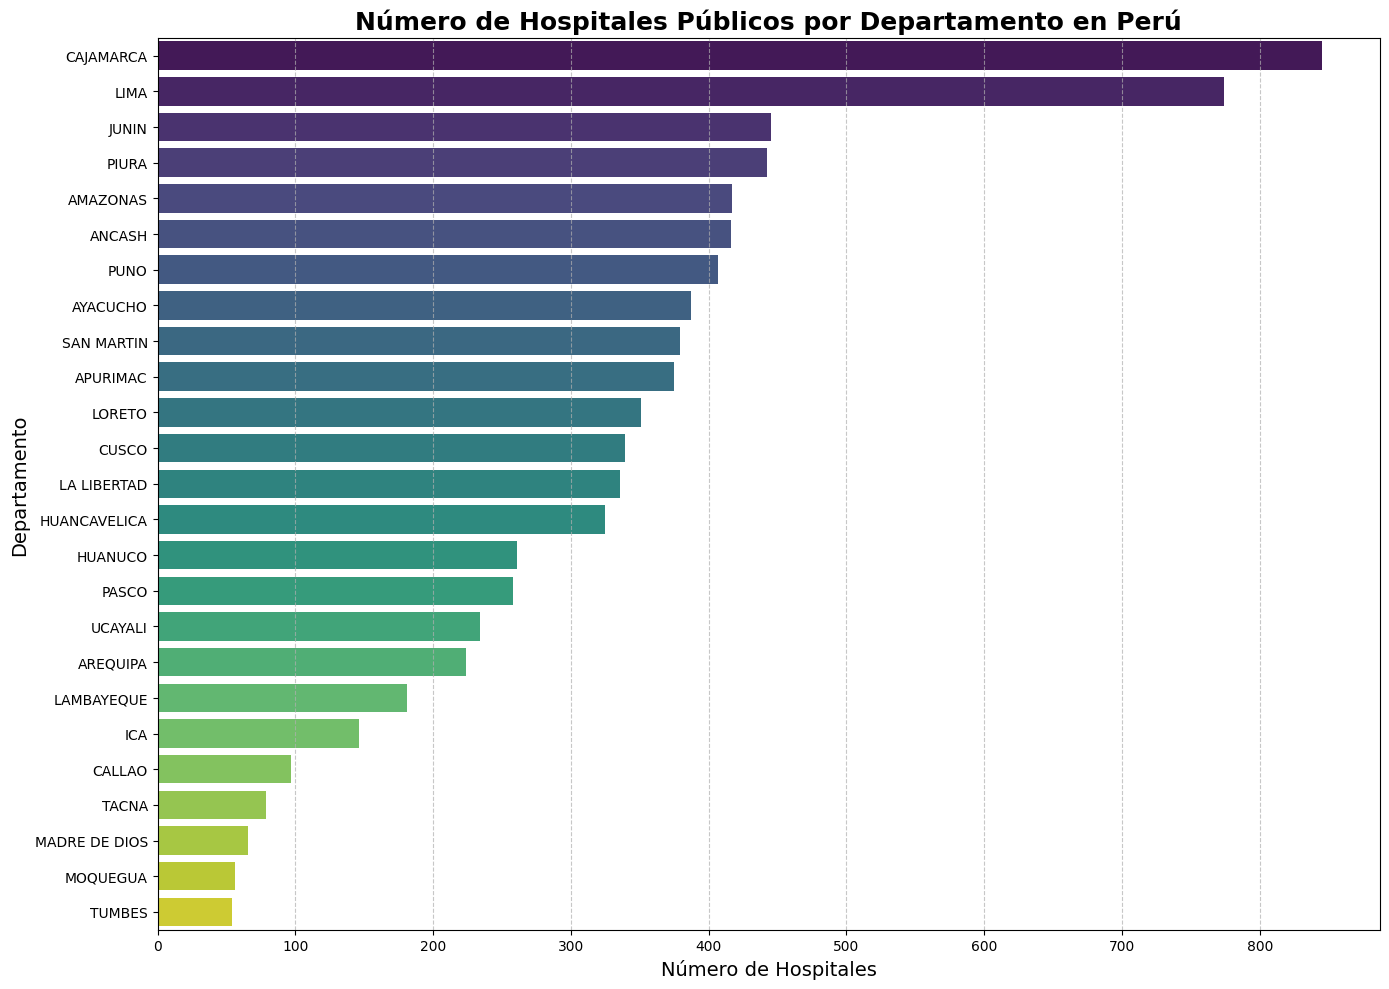

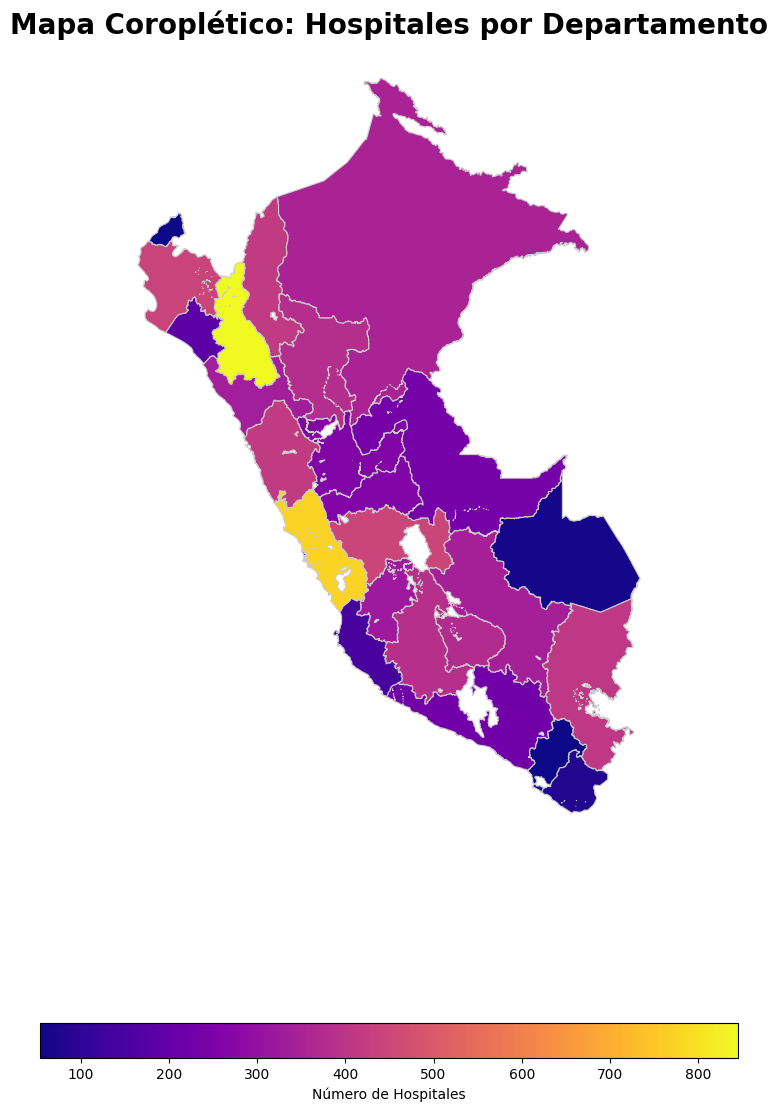

In [23]:
# Creamos un mapa único de UBIGEO -> Departamento desde nuestros datos originales.
ubigeo_to_depto = data[['UBIGEO', 'Departamento']].drop_duplicates()

# Unimos esta información a nuestro GeoDataFrame de mapas.
# Usamos un 'left' merge para asegurarnos de no perder ningún distrito del mapa.
mapa_hospitales = mapa_hospitales.merge(ubigeo_to_depto, on='UBIGEO', how='left')


# --- 1. Disolver Distritos en Departamentos y Sumar Hospitales ---
# .dissolve() agrupa las geometrías.
# aggfunc='sum' suma los valores de las otras columnas numéricas para cada grupo.
mapa_departamentos = mapa_hospitales.dissolve(by='Departamento', aggfunc='sum').reset_index()

# Renombramos la columna para mayor claridad
mapa_departamentos = mapa_departamentos.rename(columns={'Total_Hospitales': 'Numero_Hospitales'})

print("GeoDataFrame a nivel de departamento creado exitosamente.")
display(mapa_departamentos.head())

# --- 2. Tabla Resumen Ordenada ---
# Ordenamos los departamentos de mayor a menor número de hospitales.
tabla_resumen = mapa_departamentos[['Departamento', 'Numero_Hospitales']].sort_values(
    by='Numero_Hospitales', 
    ascending=False
).reset_index(drop=True)


# --- 3. Identificar Departamentos con Mayor y Menor # de Hospitales ---
depto_max = tabla_resumen.iloc[0]   # El primero de la tabla ordenada
depto_min = tabla_resumen.iloc[-1]  # El último de la tabla ordenada

print("--- Tabla Resumen: Hospitales por Departamento ---")
display(tabla_resumen)

print(f"\n✅ Departamento con MÁS hospitales: {depto_max['Departamento']} ({depto_max['Numero_Hospitales']} hospitales)")
print(f"✅ Departamento con MENOS hospitales: {depto_min['Departamento']} ({depto_min['Numero_Hospitales']} hospitales)")

# --- 4. Gráfico de Barras ---
plt.figure(figsize=(14, 10))

# Usamos seaborn para un look más moderno. 'tabla_resumen' ya está ordenada.
sns.barplot(
    x='Numero_Hospitales',
    y='Departamento',
    data=tabla_resumen,
    palette='viridis',
    hue='Departamento', # Añade color a cada barra
    legend=False # Oculta la leyenda que no es necesaria
)

# --- Personalización del Gráfico ---
plt.xlabel("Número de Hospitales", fontsize=14)
plt.ylabel("Departamento", fontsize=14)
plt.title("Número de Hospitales Públicos por Departamento en Perú", fontsize=18, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta el gráfico para que todo encaje
plt.show()

# --- 5. Mapa Coroplético por Departamento ---
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

mapa_departamentos.plot(
    column='Numero_Hospitales',
    cmap='plasma',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Número de Hospitales",
        'orientation': "horizontal",
        'shrink': 0.6
    },
    ax=ax
)

# --- Personalización del Gráfico ---
ax.set_axis_off()
ax.set_title("Mapa Coroplético: Hospitales por Departamento", fontsize=20, fontweight='bold')
plt.show()